In [1]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
df1=pd.read_excel(r"C:\Users\DELL\OneDrive\Desktop\flight_prediction_datasets\Data_Train.xlsx")
df1

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302
...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,9/04/2019,Kolkata,Banglore,CCU → BLR,19:55,22:25,2h 30m,non-stop,No info,4107
10679,Air India,27/04/2019,Kolkata,Banglore,CCU → BLR,20:45,23:20,2h 35m,non-stop,No info,4145
10680,Jet Airways,27/04/2019,Banglore,Delhi,BLR → DEL,08:20,11:20,3h,non-stop,No info,7229
10681,Vistara,01/03/2019,Banglore,New Delhi,BLR → DEL,11:30,14:10,2h 40m,non-stop,No info,12648


In [3]:
df2=pd.read_excel(r"C:\Users\DELL\OneDrive\Desktop\flight_prediction_datasets\Test_set.xlsx")
df2

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1 stop,No info
2,Jet Airways,21/05/2019,Delhi,Cochin,DEL → BOM → COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included
3,Multiple carriers,21/05/2019,Delhi,Cochin,DEL → BOM → COK,08:00,21:00,13h,1 stop,No info
4,Air Asia,24/06/2019,Banglore,Delhi,BLR → DEL,23:55,02:45 25 Jun,2h 50m,non-stop,No info
...,...,...,...,...,...,...,...,...,...,...
2666,Air India,6/06/2019,Kolkata,Banglore,CCU → DEL → BLR,20:30,20:25 07 Jun,23h 55m,1 stop,No info
2667,IndiGo,27/03/2019,Kolkata,Banglore,CCU → BLR,14:20,16:55,2h 35m,non-stop,No info
2668,Jet Airways,6/03/2019,Delhi,Cochin,DEL → BOM → COK,21:50,04:25 07 Mar,6h 35m,1 stop,No info
2669,Air India,6/03/2019,Delhi,Cochin,DEL → BOM → COK,04:00,19:15,15h 15m,1 stop,No info


In [4]:
df1=df1.rename(columns=str.lower)
df2=df2.rename(columns=str.lower)

In [5]:
df1['airline'].value_counts()

Jet Airways                          3849
IndiGo                               2053
Air India                            1752
Multiple carriers                    1196
SpiceJet                              818
Vistara                               479
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: airline, dtype: int64

In [6]:
train_size=df1.shape[0]
train_size

10683

In [7]:
test_size=df2.shape[0]
test_size

2671

In [8]:
df=pd.concat([df1,df2],axis=0,ignore_index=True)
df

,airline,date_of_journey,source,destination,route,dep_time,arrival_time,duration,total_stops,additional_info,price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897.0
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662.0
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882.0
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218.0
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302.0
...,...,...,...,...,...,...,...,...,...,...,...
13349,Air India,6/06/2019,Kolkata,Banglore,CCU → DEL → BLR,20:30,20:25 07 Jun,23h 55m,1 stop,No info,NaN
13350,IndiGo,27/03/2019,Kolkata,Banglore,CCU → BLR,14:20,16:55,2h 35m,non-stop,No info,NaN
13351,Jet Airways,6/03/2019,Delhi,Cochin,DEL → BOM → COK,21:50,04:25 07 Mar,6h 35m,1 stop,No info,NaN
13352,Air India,6/03/2019,Delhi,Cochin,DEL → BOM → COK,04:00,19:15,15h 15m,1 stop,No info,NaN


In [9]:
for i in df:
    print(f"for column {i},\n{df[i].value_counts()}\n\n")

for column airline,
Jet Airways                          4746
IndiGo                               2564
Air India                            2192
Multiple carriers                    1543
SpiceJet                             1026
Vistara                               608
Air Asia                              405
GoAir                                 240
Multiple carriers Premium economy      16
Jet Airways Business                    8
Vistara Premium economy                 5
Trujet                                  1
Name: airline, dtype: int64


for column date_of_journey,
18/05/2019    633
6/06/2019     630
9/05/2019     628
12/06/2019    628
21/05/2019    615
9/06/2019     614
21/03/2019    516
15/05/2019    511
27/05/2019    447
24/06/2019    436
15/06/2019    433
1/06/2019     430
27/06/2019    430
3/06/2019     425
6/03/2019     405
24/03/2019    401
27/03/2019    364
24/05/2019    357
6/05/2019     355
1/05/2019     339
1/04/2019     335
12/05/2019    327
3/03/2019     280
9/03

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13354 entries, 0 to 13353
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   airline          13354 non-null  object 
 1   date_of_journey  13354 non-null  object 
 2   source           13354 non-null  object 
 3   destination      13354 non-null  object 
 4   route            13353 non-null  object 
 5   dep_time         13354 non-null  object 
 6   arrival_time     13354 non-null  object 
 7   duration         13354 non-null  object 
 8   total_stops      13353 non-null  object 
 9   additional_info  13354 non-null  object 
 10  price            10683 non-null  float64
dtypes: float64(1), object(10)
memory usage: 1.1+ MB


In [11]:
df.isna().sum()

airline               0
date_of_journey       0
source                0
destination           0
route                 1
dep_time              0
arrival_time          0
duration              0
total_stops           1
additional_info       0
price              2671
dtype: int64

In [12]:
df['date_of_journey'] = pd.to_datetime(df['date_of_journey'],format='%d/%m/%Y')
df['day_of_journey']=df['date_of_journey'].dt.day
df['month_of_journey']=df['date_of_journey'].dt.month
df['year_of_journey']=df['date_of_journey'].dt.year

In [13]:
df.drop('date_of_journey',axis=1,inplace=True)
df

,airline,source,destination,route,dep_time,arrival_time,duration,total_stops,additional_info,price,day_of_journey,month_of_journey,year_of_journey
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897.0,24,3,2019
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662.0,1,5,2019
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882.0,9,6,2019
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218.0,12,5,2019
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302.0,1,3,2019
...,...,...,...,...,...,...,...,...,...,...,...,...,...
13349,Air India,Kolkata,Banglore,CCU → DEL → BLR,20:30,20:25 07 Jun,23h 55m,1 stop,No info,NaN,6,6,2019
13350,IndiGo,Kolkata,Banglore,CCU → BLR,14:20,16:55,2h 35m,non-stop,No info,NaN,27,3,2019
13351,Jet Airways,Delhi,Cochin,DEL → BOM → COK,21:50,04:25 07 Mar,6h 35m,1 stop,No info,NaN,6,3,2019
13352,Air India,Delhi,Cochin,DEL → BOM → COK,04:00,19:15,15h 15m,1 stop,No info,NaN,6,3,2019


In [14]:
df.head()

,airline,source,destination,route,dep_time,arrival_time,duration,total_stops,additional_info,price,day_of_journey,month_of_journey,year_of_journey
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897.0,24,3,2019
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662.0,1,5,2019
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882.0,9,6,2019
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218.0,12,5,2019
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302.0,1,3,2019


In [15]:
df['dep_time']=pd.to_datetime(df['dep_time'],format='%H:%M')
df['dep_time_hr']=df['dep_time'].dt.hour
df['dep_time_min']=df['dep_time'].dt.minute

In [16]:
l=[]
count=0
for i in df['arrival_time']:
    df['arrival_time'][count]=i.split(' ')[0]
    if i in df['arrival_time'][count]:
        l.append('same day')
    else:
        l.append('next day')
    count+=1

In [17]:
df['arrival_day']=l
df

,airline,source,destination,route,dep_time,arrival_time,duration,total_stops,additional_info,price,day_of_journey,month_of_journey,year_of_journey,dep_time_hr,dep_time_min,arrival_day
0,IndiGo,Banglore,New Delhi,BLR → DEL,1900-01-01 22:20:00,01:10,2h 50m,non-stop,No info,3897.0,24,3,2019,22,20,next day
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,1900-01-01 05:50:00,13:15,7h 25m,2 stops,No info,7662.0,1,5,2019,5,50,same day
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,1900-01-01 09:25:00,04:25,19h,2 stops,No info,13882.0,9,6,2019,9,25,next day
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,1900-01-01 18:05:00,23:30,5h 25m,1 stop,No info,6218.0,12,5,2019,18,5,same day
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,1900-01-01 16:50:00,21:35,4h 45m,1 stop,No info,13302.0,1,3,2019,16,50,same day
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13349,Air India,Kolkata,Banglore,CCU → DEL → BLR,1900-01-01 20:30:00,20:25,23h 55m,1 stop,No info,NaN,6,6,2019,20,30,next day
13350,IndiGo,Kolkata,Banglore,CCU → BLR,1900-01-01 14:20:00,16:55,2h 35m,non-stop,No info,NaN,27,3,2019,14,20,same day
13351,Jet Airways,Delhi,Cochin,DEL → BOM → COK,1900-01-01 21:50:00,04:25,6h 35m,1 stop,No info,NaN,6,3,2019,21,50,next day
13352,Air India,Delhi,Cochin,DEL → BOM → COK,1900-01-01 04:00:00,19:15,15h 15m,1 stop,No info,NaN,6,3,2019,4,0,same day


In [18]:
df['arrival_time']=pd.to_datetime(df['arrival_time'],format='%H:%M')
df['arr_time_hr']=df['arrival_time'].dt.hour
df['arr_time_min']=df['arrival_time'].dt.minute

In [20]:
df.drop(['arrival_time','dep_time'],axis=1,inplace=True)
df

,airline,source,destination,route,duration,total_stops,additional_info,price,day_of_journey,month_of_journey,year_of_journey,dep_time_hr,dep_time_min,arrival_day,arr_time_hr,arr_time_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897.0,24,3,2019,22,20,next day,1,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662.0,1,5,2019,5,50,same day,13,15
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h,2 stops,No info,13882.0,9,6,2019,9,25,next day,4,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1 stop,No info,6218.0,12,5,2019,18,5,same day,23,30
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,1 stop,No info,13302.0,1,3,2019,16,50,same day,21,35
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13349,Air India,Kolkata,Banglore,CCU → DEL → BLR,23h 55m,1 stop,No info,NaN,6,6,2019,20,30,next day,20,25
13350,IndiGo,Kolkata,Banglore,CCU → BLR,2h 35m,non-stop,No info,NaN,27,3,2019,14,20,same day,16,55
13351,Jet Airways,Delhi,Cochin,DEL → BOM → COK,6h 35m,1 stop,No info,NaN,6,3,2019,21,50,next day,4,25
13352,Air India,Delhi,Cochin,DEL → BOM → COK,15h 15m,1 stop,No info,NaN,6,3,2019,4,0,same day,19,15


In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13354 entries, 0 to 13353
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   airline           13354 non-null  object 
 1   source            13354 non-null  object 
 2   destination       13354 non-null  object 
 3   route             13353 non-null  object 
 4   duration          13354 non-null  object 
 5   total_stops       13353 non-null  object 
 6   additional_info   13354 non-null  object 
 7   price             10683 non-null  float64
 8   day_of_journey    13354 non-null  int64  
 9   month_of_journey  13354 non-null  int64  
 10  year_of_journey   13354 non-null  int64  
 11  dep_time_hr       13354 non-null  int64  
 12  dep_time_min      13354 non-null  int64  
 13  arrival_day       13354 non-null  object 
 14  arr_time_hr       13354 non-null  int64  
 15  arr_time_min      13354 non-null  int64  
dtypes: float64(1), int64(7), object(8)
memor

In [24]:
df['duration'].value_counts()

2h 50m     672
1h 30m     493
2h 45m     432
2h 55m     418
2h 35m     399
          ... 
29h 10m      1
32h 55m      1
31h 30m      1
35h 20m      1
32h 25m      1
Name: duration, Length: 374, dtype: int64

In [53]:
lm=[]
for j in df['duration']:
    if 'h' in j:
        hh=j.split('h')[0]
        if 'm' in j:
            mm = (j.split('h')[1].strip()).split('m')[0]
        else:
            mm=0
    else:
        hh=0
        mm=j.split('m')[0]
    mins= int(hh)*60 + int(mm)
    lm.append(mins)

In [55]:
df['duration_in_mins']=lm
df.head()

,airline,source,destination,route,duration,total_stops,additional_info,price,day_of_journey,month_of_journey,year_of_journey,dep_time_hr,dep_time_min,arrival_day,arr_time_hr,arr_time_min,duration_in_mins
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897.0,24,3,2019,22,20,next day,1,10,170
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662.0,1,5,2019,5,50,same day,13,15,445
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h,2 stops,No info,13882.0,9,6,2019,9,25,next day,4,25,1140
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1 stop,No info,6218.0,12,5,2019,18,5,same day,23,30,325
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,1 stop,No info,13302.0,1,3,2019,16,50,same day,21,35,285


In [56]:
df.drop('duration',axis=1,inplace=True)
df

,airline,source,destination,route,total_stops,additional_info,price,day_of_journey,month_of_journey,year_of_journey,dep_time_hr,dep_time_min,arrival_day,arr_time_hr,arr_time_min,duration_in_mins
0,IndiGo,Banglore,New Delhi,BLR → DEL,non-stop,No info,3897.0,24,3,2019,22,20,next day,1,10,170
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2 stops,No info,7662.0,1,5,2019,5,50,same day,13,15,445
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2 stops,No info,13882.0,9,6,2019,9,25,next day,4,25,1140
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,1 stop,No info,6218.0,12,5,2019,18,5,same day,23,30,325
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,1 stop,No info,13302.0,1,3,2019,16,50,same day,21,35,285
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13349,Air India,Kolkata,Banglore,CCU → DEL → BLR,1 stop,No info,NaN,6,6,2019,20,30,next day,20,25,1435
13350,IndiGo,Kolkata,Banglore,CCU → BLR,non-stop,No info,NaN,27,3,2019,14,20,same day,16,55,155
13351,Jet Airways,Delhi,Cochin,DEL → BOM → COK,1 stop,No info,NaN,6,3,2019,21,50,next day,4,25,395
13352,Air India,Delhi,Cochin,DEL → BOM → COK,1 stop,No info,NaN,6,3,2019,4,0,same day,19,15,915


In [57]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13354 entries, 0 to 13353
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   airline           13354 non-null  object 
 1   source            13354 non-null  object 
 2   destination       13354 non-null  object 
 3   route             13353 non-null  object 
 4   total_stops       13353 non-null  object 
 5   additional_info   13354 non-null  object 
 6   price             10683 non-null  float64
 7   day_of_journey    13354 non-null  int64  
 8   month_of_journey  13354 non-null  int64  
 9   year_of_journey   13354 non-null  int64  
 10  dep_time_hr       13354 non-null  int64  
 11  dep_time_min      13354 non-null  int64  
 12  arrival_day       13354 non-null  object 
 13  arr_time_hr       13354 non-null  int64  
 14  arr_time_min      13354 non-null  int64  
 15  duration_in_mins  13354 non-null  int64  
dtypes: float64(1), int64(8), object(7)
memor

In [58]:
cat_cols=[]
for i in df:
    if df[i].dtype=='object':
        cat_cols.append(i)
cat_cols

['airline',
 'source',
 'destination',
 'route',
 'total_stops',
 'additional_info',
 'arrival_day']

In [59]:
df.isna().sum()

airline                0
source                 0
destination            0
route                  1
total_stops            1
additional_info        0
price               2671
day_of_journey         0
month_of_journey       0
year_of_journey        0
dep_time_hr            0
dep_time_min           0
arrival_day            0
arr_time_hr            0
arr_time_min           0
duration_in_mins       0
dtype: int64

In [60]:
ind=np.where(df['route'].isna())

In [61]:
ind

(array([9039], dtype=int64),)

In [63]:
df['route'][9039]=df['route'].mode()[0]

In [64]:
ind1=np.where(df['total_stops'].isna())
ind1

(array([9039], dtype=int64),)

In [65]:
df['total_stops'][9039]=df['total_stops'].mode()[0]

In [66]:
df.isna().sum()

airline                0
source                 0
destination            0
route                  0
total_stops            0
additional_info        0
price               2671
day_of_journey         0
month_of_journey       0
year_of_journey        0
dep_time_hr            0
dep_time_min           0
arrival_day            0
arr_time_hr            0
arr_time_min           0
duration_in_mins       0
dtype: int64

In [67]:
# for encoding, i m going to use label encoder..

In [68]:
for i in df:
    print(f"for column {i}\n{df[i].value_counts()}\n\n")

for column airline
Jet Airways                          4746
IndiGo                               2564
Air India                            2192
Multiple carriers                    1543
SpiceJet                             1026
Vistara                               608
Air Asia                              405
GoAir                                 240
Multiple carriers Premium economy      16
Jet Airways Business                    8
Vistara Premium economy                 5
Trujet                                  1
Name: airline, dtype: int64


for column source
Delhi       5682
Kolkata     3581
Banglore    2752
Mumbai       883
Chennai      456
Name: source, dtype: int64


for column destination
Cochin       5682
Banglore     3581
Delhi        1582
New Delhi    1170
Hyderabad     883
Kolkata       456
Name: destination, dtype: int64


for column route
DEL → BOM → COK                3001
BLR → DEL                      1941
CCU → BOM → BLR                1232
CCU → BLR                

In [69]:
# as for additional_info column, there are almost 80%values of no-info, so,it's not required.. and also, for year_of_journey, there is single value for entire dataset.. hence, of no use..

In [70]:
df.drop(['year_of_journey','additional_info'],axis=1,inplace=True)
df

,airline,source,destination,route,total_stops,price,day_of_journey,month_of_journey,dep_time_hr,dep_time_min,arrival_day,arr_time_hr,arr_time_min,duration_in_mins
0,IndiGo,Banglore,New Delhi,BLR → DEL,non-stop,3897.0,24,3,22,20,next day,1,10,170
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2 stops,7662.0,1,5,5,50,same day,13,15,445
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2 stops,13882.0,9,6,9,25,next day,4,25,1140
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,1 stop,6218.0,12,5,18,5,same day,23,30,325
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,1 stop,13302.0,1,3,16,50,same day,21,35,285
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13349,Air India,Kolkata,Banglore,CCU → DEL → BLR,1 stop,NaN,6,6,20,30,next day,20,25,1435
13350,IndiGo,Kolkata,Banglore,CCU → BLR,non-stop,NaN,27,3,14,20,same day,16,55,155
13351,Jet Airways,Delhi,Cochin,DEL → BOM → COK,1 stop,NaN,6,3,21,50,next day,4,25,395
13352,Air India,Delhi,Cochin,DEL → BOM → COK,1 stop,NaN,6,3,4,0,same day,19,15,915


In [71]:
cat_cols

['airline',
 'source',
 'destination',
 'route',
 'total_stops',
 'additional_info',
 'arrival_day']

In [72]:
cat_cols.remove('additional_info')

In [78]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [75]:
df.head(2)

,airline,source,destination,route,total_stops,price,day_of_journey,month_of_journey,dep_time_hr,dep_time_min,arrival_day,arr_time_hr,arr_time_min,duration_in_mins
0,IndiGo,Banglore,New Delhi,BLR → DEL,non-stop,3897.0,24,3,22,20,next day,1,10,170
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2 stops,7662.0,1,5,5,50,same day,13,15,445


In [81]:
for i in cat_cols:
    df[i]=le.fit_transform(df[[i]])

In [82]:
df

,airline,source,destination,route,total_stops,price,day_of_journey,month_of_journey,dep_time_hr,dep_time_min,arrival_day,arr_time_hr,arr_time_min,duration_in_mins
0,3,0,5,18,4,3897.0,24,3,22,20,0,1,10,170
1,1,3,0,87,1,7662.0,1,5,5,50,1,13,15,445
2,4,2,1,122,1,13882.0,9,6,9,25,0,4,25,1140
3,3,3,0,95,0,6218.0,12,5,18,5,1,23,30,325
4,3,0,5,29,0,13302.0,1,3,16,50,1,21,35,285
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13349,1,3,0,76,0,NaN,6,6,20,30,0,20,25,1435
13350,3,3,0,67,4,NaN,27,3,14,20,1,16,55,155
13351,4,2,1,108,0,NaN,6,3,21,50,0,4,25,395
13352,1,2,1,108,0,NaN,6,3,4,0,1,19,15,915


In [85]:
cont_cols=['day_of_journey','month_of_journey','dep_time_hr','dep_time_min','arr_time_hr','arr_time_min','duration_in_mins']

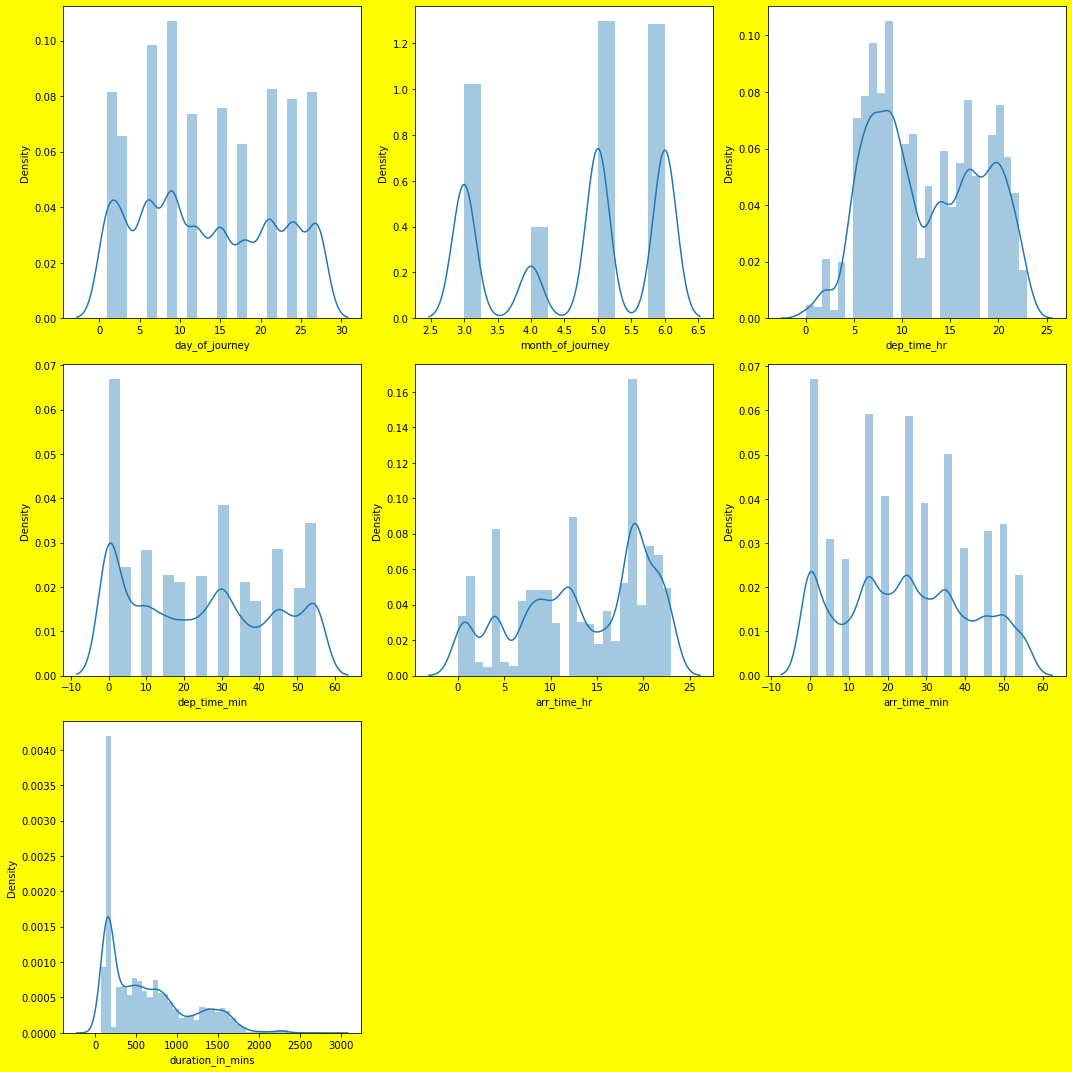

In [86]:
plotno=1
plt.figure(figsize=(15,15),facecolor='yellow')
for i in cont_cols:
    plt.subplot(3,3,plotno)
    sns.distplot(df[i])
    plt.xlabel(i)
    plotno+=1
plt.tight_layout()

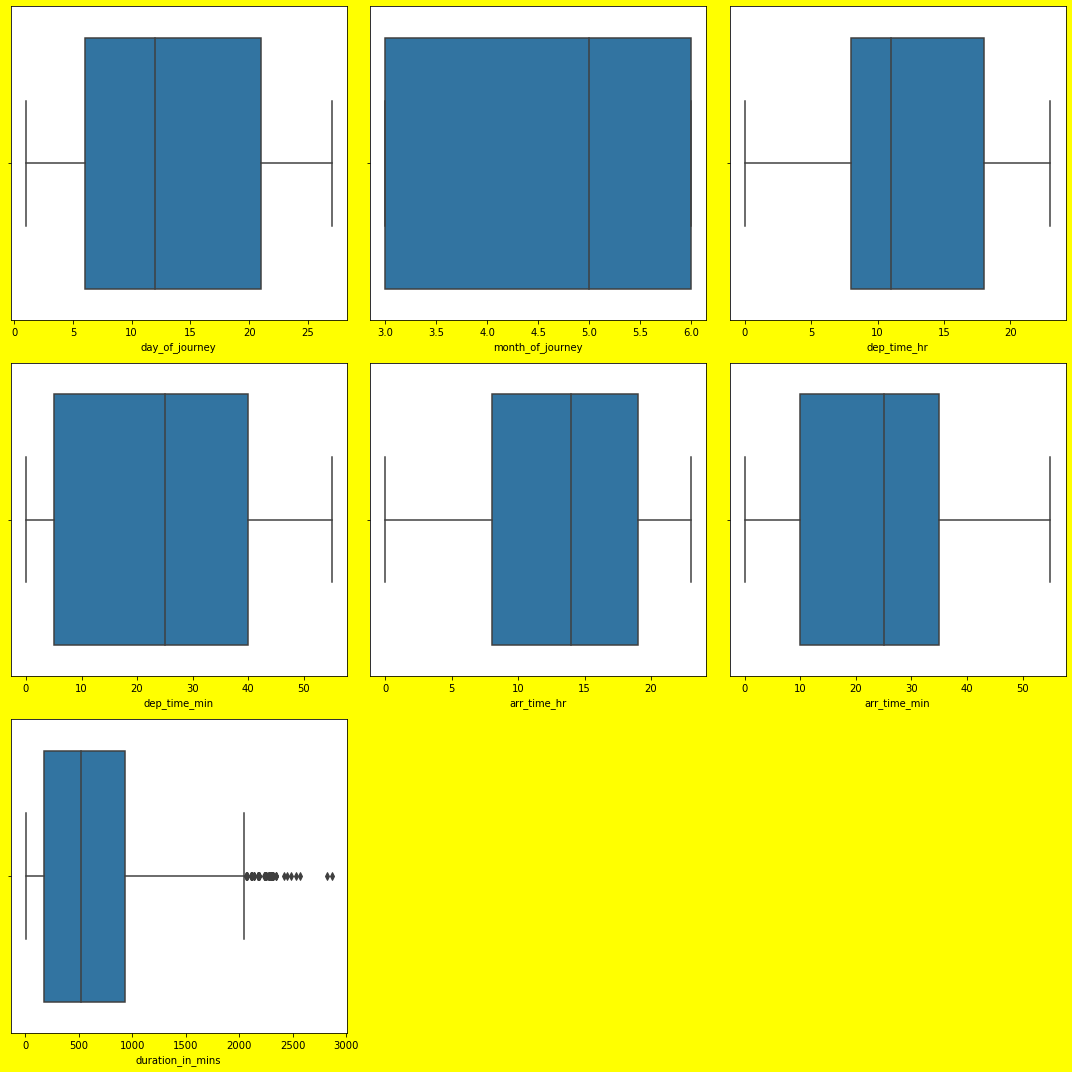

In [87]:
plotno=1
plt.figure(figsize=(15,15),facecolor='yellow')
for i in cont_cols:
    plt.subplot(3,3,plotno)
    sns.boxplot(df[i])
    plt.xlabel(i)
    plotno+=1
plt.tight_layout()

In [88]:
# there are outliers present in duration_in_mins only..

In [89]:
from scipy.stats import zscore

In [90]:
((np.abs(zscore(df)))>3).any()

airline             False
source              False
destination         False
route               False
total_stops         False
price               False
day_of_journey      False
month_of_journey    False
dep_time_hr         False
dep_time_min        False
arrival_day         False
arr_time_hr         False
arr_time_min        False
duration_in_mins     True
dtype: bool

In [91]:
ind2 = np.where((np.abs(zscore(df['duration_in_mins'])))>3)
ind2

(array([  226,   553,   966,   969,  1067,  1113,  1346,  1442,  1496,
         1551,  1657,  1791,  1804,  2172,  2553,  2641,  2654,  2718,
         3457,  3790,  3815,  3966,  4047,  4118,  4463,  4655,  5516,
         5701,  5711,  5782,  5933,  5953,  6059,  6085,  6321,  6476,
         6884,  7189,  7232,  7306,  7329,  7553,  7611,  7612,  7876,
         7906,  8127,  8153,  8360,  8409,  8412,  8601,  8621,  8698,
         8729,  9247,  9396,  9484,  9551,  9673,  9703,  9848, 10020,
        10326, 10456, 10639, 10934, 11193, 11469, 11705, 11954, 11962,
        12062, 12194, 12237, 12369, 12372, 12464, 12601, 12628, 12797,
        13042, 13155, 13175], dtype=int64),)

In [92]:
df.skew()

airline             0.720924
source             -0.424151
destination         1.247893
route              -0.521448
total_stops         0.639737
price               1.812552
day_of_journey      0.135142
month_of_journey   -0.390684
dep_time_hr         0.109087
dep_time_min        0.159397
arrival_day        -0.389428
arr_time_hr        -0.384591
arr_time_min        0.111711
duration_in_mins    0.867883
dtype: float64

<AxesSubplot:>

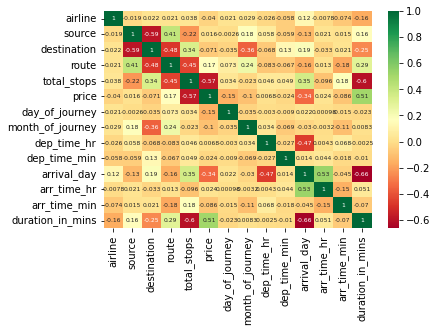

In [96]:
sns.heatmap(df.corr(),annot=True,annot_kws={'size':6},cmap='RdYlGn')

In [100]:
df_train=df[0:train_size]
df_test=df[train_size:]

In [98]:
df_train

,airline,source,destination,route,total_stops,price,day_of_journey,month_of_journey,dep_time_hr,dep_time_min,arrival_day,arr_time_hr,arr_time_min,duration_in_mins
0,3,0,5,18,4,3897.0,24,3,22,20,0,1,10,170
1,1,3,0,87,1,7662.0,1,5,5,50,1,13,15,445
2,4,2,1,122,1,13882.0,9,6,9,25,0,4,25,1140
3,3,3,0,95,0,6218.0,12,5,18,5,1,23,30,325
4,3,0,5,29,0,13302.0,1,3,16,50,1,21,35,285
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,0,3,0,67,4,4107.0,9,4,19,55,1,22,25,150
10679,1,3,0,67,4,4145.0,27,4,20,45,1,23,20,155
10680,4,0,2,18,4,7229.0,27,4,8,20,1,11,20,180
10681,10,0,5,18,4,12648.0,1,3,11,30,1,14,10,160


In [103]:
df_test.reset_index(drop=True,inplace=True)
df_test

,airline,source,destination,route,total_stops,price,day_of_journey,month_of_journey,dep_time_hr,dep_time_min,arrival_day,arr_time_hr,arr_time_min,duration_in_mins
0,4,2,1,108,0,NaN,6,6,17,30,0,4,25,655
1,3,3,0,94,0,NaN,12,5,6,20,1,10,20,240
2,4,2,1,108,0,NaN,21,5,19,15,0,19,0,1425
3,6,2,1,108,0,NaN,21,5,8,0,1,21,0,780
4,0,0,2,18,4,NaN,24,6,23,55,0,2,45,170
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2666,1,3,0,76,0,NaN,6,6,20,30,0,20,25,1435
2667,3,3,0,67,4,NaN,27,3,14,20,1,16,55,155
2668,4,2,1,108,0,NaN,6,3,21,50,0,4,25,395
2669,1,2,1,108,0,NaN,6,3,4,0,1,19,15,915


In [104]:
ind2 = np.where((np.abs(zscore(df_train['duration_in_mins'])))>3)
ind2

(array([  226,   553,   966,   969,  1067,  1113,  1346,  1442,  1496,
         1551,  1657,  1791,  1804,  2172,  2553,  2641,  2654,  2718,
         3457,  3790,  3815,  3966,  4047,  4118,  4463,  4655,  5516,
         5701,  5711,  5782,  5933,  5953,  6059,  6085,  6321,  6476,
         6884,  7189,  7232,  7306,  7329,  7553,  7611,  7612,  7876,
         7906,  8127,  8153,  8360,  8409,  8412,  8601,  8621,  8698,
         8729,  9247,  9396,  9484,  9551,  9673,  9703,  9848, 10020,
        10326, 10456, 10639], dtype=int64),)

In [107]:
df_train.drop(df_train.index[ind2],inplace=True)
df_train

,airline,source,destination,route,total_stops,price,day_of_journey,month_of_journey,dep_time_hr,dep_time_min,arrival_day,arr_time_hr,arr_time_min,duration_in_mins
0,3,0,5,18,4,3897.0,24,3,22,20,0,1,10,170
1,1,3,0,87,1,7662.0,1,5,5,50,1,13,15,445
2,4,2,1,122,1,13882.0,9,6,9,25,0,4,25,1140
3,3,3,0,95,0,6218.0,12,5,18,5,1,23,30,325
4,3,0,5,29,0,13302.0,1,3,16,50,1,21,35,285
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,0,3,0,67,4,4107.0,9,4,19,55,1,22,25,150
10679,1,3,0,67,4,4145.0,27,4,20,45,1,23,20,155
10680,4,0,2,18,4,7229.0,27,4,8,20,1,11,20,180
10681,10,0,5,18,4,12648.0,1,3,11,30,1,14,10,160


In [108]:
df_train.reset_index(drop=True,inplace=True)
df_train

,airline,source,destination,route,total_stops,price,day_of_journey,month_of_journey,dep_time_hr,dep_time_min,arrival_day,arr_time_hr,arr_time_min,duration_in_mins
0,3,0,5,18,4,3897.0,24,3,22,20,0,1,10,170
1,1,3,0,87,1,7662.0,1,5,5,50,1,13,15,445
2,4,2,1,122,1,13882.0,9,6,9,25,0,4,25,1140
3,3,3,0,95,0,6218.0,12,5,18,5,1,23,30,325
4,3,0,5,29,0,13302.0,1,3,16,50,1,21,35,285
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10612,0,3,0,67,4,4107.0,9,4,19,55,1,22,25,150
10613,1,3,0,67,4,4145.0,27,4,20,45,1,23,20,155
10614,4,0,2,18,4,7229.0,27,4,8,20,1,11,20,180
10615,10,0,5,18,4,12648.0,1,3,11,30,1,14,10,160


In [109]:
from sklearn.preprocessing import PowerTransformer
pt=PowerTransformer()

In [110]:
for i in cont_cols:
    df_train[i]=pt.fit_transform(df_train[[i]])
    df_test[i]=pt.fit_transform(df_test[[i]])

In [119]:
df_train.skew()

airline             0.728798
source             -0.423207
destination         1.239195
route              -0.516370
total_stops         0.627492
price               1.824502
day_of_journey     -0.204334
month_of_journey   -0.218548
dep_time_hr        -0.106011
dep_time_min       -0.360460
arrival_day        -0.399424
arr_time_hr        -0.353328
arr_time_min       -0.349944
duration_in_mins   -0.049319
dtype: float64

In [111]:
df_train.corr()

,airline,source,destination,route,total_stops,price,day_of_journey,month_of_journey,dep_time_hr,dep_time_min,arrival_day,arr_time_hr,arr_time_min,duration_in_mins
airline,1.000000,-0.013644,0.018738,0.027728,0.035669,-0.036874,0.023943,0.021728,-0.037484,-0.065824,0.121826,-0.002372,-0.072910,-0.126530
source,-0.013644,1.000000,-0.592476,0.408910,-0.225922,0.016718,0.007017,0.174957,0.061739,-0.035965,-0.128884,0.026235,0.026462,0.134805
destination,0.018738,-0.592476,1.000000,-0.467256,0.338653,-0.072290,-0.042299,-0.345228,-0.079403,0.113487,0.193379,-0.040484,0.019430,-0.330217
route,0.027728,0.408910,-0.467256,1.000000,-0.443849,0.166487,0.078088,0.252864,-0.059050,-0.061411,-0.157849,0.012342,-0.173837,0.364707
total_stops,0.035669,-0.225922,0.338653,-0.443849,1.000000,-0.572413,0.024901,-0.033242,0.030073,0.072305,0.358503,-0.095300,0.170174,-0.790961
price,-0.036874,0.016718,-0.072290,0.166487,-0.572413,1.000000,-0.153411,-0.088148,0.017005,-0.047694,-0.339189,0.021007,-0.088696,0.597702
day_of_journey,0.023943,0.007017,-0.042299,0.078088,0.024901,-0.153411,1.000000,-0.035756,0.003252,-0.006044,0.013942,-0.002880,-0.017667,-0.020433
month_of_journey,0.021728,0.174957,-0.345228,0.252864,-0.033242,-0.088148,-0.035756,1.000000,0.033441,-0.051495,-0.043963,-0.000843,-0.106415,0.046310
dep_time_hr,-0.037484,0.061739,-0.079403,-0.059050,0.030073,0.017005,0.003252,0.033441,1.000000,-0.032990,-0.474264,0.031352,0.065051,0.008322
dep_time_min,-0.065824,-0.035965,0.113487,-0.061411,0.072305,-0.047694,-0.006044,-0.051495,-0.032990,1.000000,0.022376,0.036162,-0.006957,-0.048163


In [112]:
train_size=df_train.shape[0]
train_size

10617

In [113]:
df1=pd.concat([df_train,df_test],axis=0,ignore_index=True)
df1

,airline,source,destination,route,total_stops,price,day_of_journey,month_of_journey,dep_time_hr,dep_time_min,arrival_day,arr_time_hr,arr_time_min,duration_in_mins
0,3,0,5,18,4,3897.0,1.164795,-1.407345,1.545384,0.021884,0,-1.789027,-0.774893,-1.059071
1,1,3,0,87,1,7662.0,-1.716312,0.154326,-1.364311,1.178798,1,-0.049071,-0.431743,-0.050797
2,4,2,1,122,1,13882.0,-0.406492,1.174359,-0.558898,0.254713,0,-1.357336,0.157366,1.066135
3,3,3,0,95,0,6218.0,-0.042505,0.154326,0.950993,-0.934777,1,1.415322,0.421041,-0.394288
4,3,0,5,29,0,13302.0,-1.716312,-1.407345,0.639332,1.178798,1,1.121837,0.670182,-0.533682
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13283,1,3,0,76,0,NaN,-0.753498,1.162712,1.253536,0.443282,0,0.915774,0.174993,1.352354
13284,3,3,0,67,4,NaN,1.496187,-1.400476,0.304857,0.004594,1,0.333918,1.535120,-1.159200
13285,4,2,1,108,0,NaN,-0.753498,-1.400476,1.402960,1.147108,0,-1.361817,0.174993,-0.201183
13286,1,2,1,108,0,NaN,-0.753498,-1.400476,-1.621454,-1.569608,1,0.769761,-0.401572,0.777379


<AxesSubplot:>

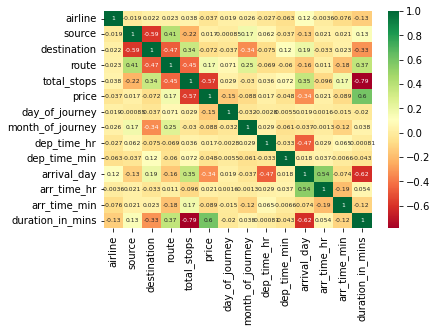

In [116]:
sns.heatmap(df1.corr(),annot=True,annot_kws={'size':6},cmap="RdYlGn")

In [117]:
# as total_stops and duration_in_mins are highly correlated with each other and total_stops is less correlated with target price..
# so, total_stops can be deleted.. but let's recheck it with vif values..

In [118]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [121]:
def vif_check (df):
    x=df.drop('price',axis=1)
    vif=pd.DataFrame()
    vif['vif']=[variance_inflation_factor(x,i) for i in range(x.shape[1])]
    vif['features']=x.columns
    print(vif)

In [122]:
vif_check(df_train)

          vif          features
0    3.950251           airline
1    4.939061            source
2    3.089209       destination
3    8.196452             route
4    3.896323       total_stops
5    1.018512    day_of_journey
6    1.200075  month_of_journey
7    2.587451       dep_time_hr
8    1.037762      dep_time_min
9   18.072932       arrival_day
10   3.652364       arr_time_hr
11   1.128988      arr_time_min
12   5.386241  duration_in_mins


In [123]:
df_train.drop('arrival_day',axis=1,inplace=True)
df_test.drop('arrival_day',axis=1,inplace=True)
vif_check(df_train)

         vif          features
0   3.464606           airline
1   4.588881            source
2   2.490980       destination
3   5.874190             route
4   3.875898       total_stops
5   1.017532    day_of_journey
6   1.199225  month_of_journey
7   1.026603       dep_time_hr
8   1.023867      dep_time_min
9   1.051641       arr_time_hr
10  1.118550      arr_time_min
11  2.451473  duration_in_mins


<AxesSubplot:>

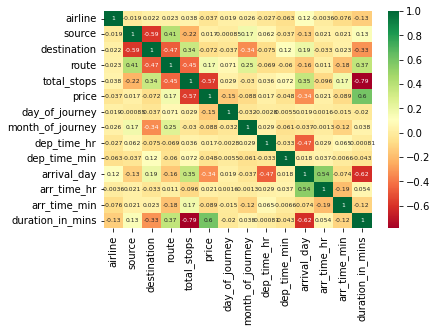

In [124]:
sns.heatmap(df1.corr(),annot=True,annot_kws={'size':6},cmap="RdYlGn")

In [125]:
vif_check(df1)

          vif          features
0    3.934910           airline
1    4.926052            source
2    3.083648       destination
3    8.253236             route
4    3.843643       total_stops
5    1.016493    day_of_journey
6    1.199609  month_of_journey
7    2.576906       dep_time_hr
8    1.040491      dep_time_min
9   18.038083       arrival_day
10   3.652716       arr_time_hr
11   1.132704      arr_time_min
12   5.391468  duration_in_mins


<AxesSubplot:>

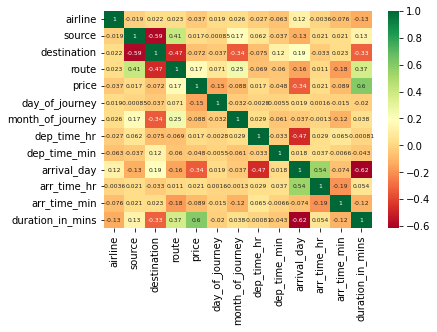

In [126]:
df1.drop('total_stops',axis=1,inplace=True)
sns.heatmap(df1.corr(),annot=True,annot_kws={'size':6},cmap="RdYlGn")

<AxesSubplot:>

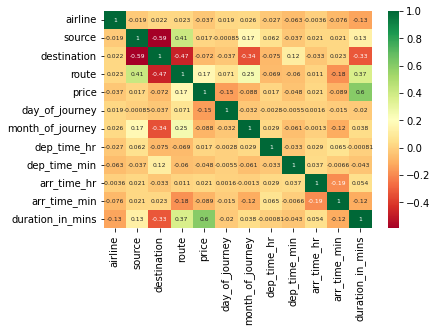

In [127]:
df1.drop('arrival_day',axis=1,inplace=True)
sns.heatmap(df1.corr(),annot=True,annot_kws={'size':6},cmap="RdYlGn")

In [128]:
df_train.drop('total_stops',axis=1,inplace=True)
df_test.drop('total_stops',axis=1,inplace=True)

In [129]:
from sklearn.preprocessing import MinMaxScaler
mms=MinMaxScaler()

In [131]:
for i in cont_cols:
    df_train[i]=mms.fit_transform(df_train[[i]])
    df_test[i]=mms.fit_transform(df_test[[i]])

In [139]:
from sklearn.metrics import r2_score, mean_absolute_error,mean_squared_error
from sklearn.linear_model import LinearRegression,Lasso,LassoCV
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR

In [138]:
def algo_check (x,y,algo):
    min_diff=1
    max_i=0
    for i in range(100):
        x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25,random_state = i)
        algo.fit(x_train,y_train)
        y_pred1 =algo.predict(x_train)
        acc1= r2_score(y_train,y_pred1)
        y_pred2 =algo.predict(x_test)
        acc2= r2_score(y_test,y_pred2)
        acc=acc1-acc2
        if acc< min_diff:
            min_diff=acc
            max_i = i
            i+=1
    x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25,random_state = max_i)
    algo.fit(x_train,y_train)
    y_pred1 =algo.predict(x_train)
    acc1= r2_score(y_train,y_pred1)
    y_pred2 =algo.predict(x_test)
    acc2= r2_score(y_test,y_pred2)
    cvs=cross_val_score(algo,x_train,y_train,cv=5,scoring='r2')
    ac=cvs.mean()
    mae=mean_absolute_error(y_pred2,y_test)
    mse=mean_squared_error(y_pred2,y_test)
    rmse=np.sqrt(mse)
    print(f'''for algo {algo}, \nthe training accuracy is {acc1}, \ntesing accuracy is {acc2} \nat random_state {max_i} 
        \nand hence, mean square error is {mse} \nand mean_absolute_error is {mae} \nand hence, rmse is {rmse}, \nalso cross_validation_score is {ac}''')

In [134]:
x1=df_train.drop('price',axis=1)
x2=df_test.drop('price',axis=1)
y1=df_train['price']
y2=df_test['price']

In [140]:
lr=LinearRegression()
dtr=DecisionTreeRegressor()
knr=KNeighborsRegressor()
abr=AdaBoostRegressor()
rfr=RandomForestRegressor()
svr=SVR()

In [141]:
algo_check(x1,y1,lr)

for algo LinearRegression(), 
the training accuracy is 0.3910453068069645, 
tesing accuracy is 0.45234245665384054 
at random_state 12 
        
and hence, mean square error is 10304946.76055544 
and mean_absolute_error is 2439.8279533161126 
and hence, rmse is 3210.131891457957, 
also cross_validation_score is 0.391481771109515


In [142]:
algo_check(x1,y1,dtr)

for algo DecisionTreeRegressor(), 
the training accuracy is 0.9710240275066029, 
tesing accuracy is 0.7321771842246969 
at random_state 99 
        
and hence, mean square error is 6230004.174877066 
and mean_absolute_error is 1349.0572190834903 
and hence, rmse is 2495.9976311841856, 
also cross_validation_score is 0.6632281730502125


In [143]:
algo_check(x1,y1,knr)

for algo KNeighborsRegressor(), 
the training accuracy is 0.8172590153101391, 
tesing accuracy is 0.7850091012713651 
at random_state 34 
        
and hence, mean square error is 4709998.826440678 
and mean_absolute_error is 1302.8760075329567 
and hence, rmse is 2170.2531710472576, 
also cross_validation_score is 0.7094169803364245


In [144]:
algo_check(x1,y1,abr)

for algo AdaBoostRegressor(), 
the training accuracy is 0.26668612957179183, 
tesing accuracy is 0.34670223288300017 
at random_state 41 
        
and hence, mean square error is 16577141.979205718 
and mean_absolute_error is 3311.3577547754453 
and hence, rmse is 4071.5036508894004, 
also cross_validation_score is 0.38118297616821184


In [145]:
algo_check(x1,y1,rfr)

for algo RandomForestRegressor(), 
the training accuracy is 0.9507993605229376, 
tesing accuracy is 0.8342210306257462 
at random_state 58 
        
and hence, mean square error is 3757776.895072536 
and mean_absolute_error is 1143.2964377752503 
and hence, rmse is 1938.4986187956224, 
also cross_validation_score is 0.776641893133578


In [147]:
algo_check(x1,y1,svr)

for algo SVR(), 
the training accuracy is 0.003135141772944383, 
tesing accuracy is 0.03443454755251585 
at random_state 77 
        
and hence, mean square error is 18129321.45215651 
and mean_absolute_error is 3378.4603961067332 
and hence, rmse is 4257.854090050117, 
also cross_validation_score is -0.0026005085015672336


In [148]:
import xgboost as xgb
xgb=xgb.XGBRegressor()

In [149]:
algo_check(x1,y1,xgb)

for algo XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimators=100, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, ...), 
the training accuracy is 0.93767459985477, 
tesing accuracy is 0.8659487826186847 
at random_state 7 
        
and hence, mean square error is 3032577.849030589 
and mean_absolute_error is 1131.0098636950477 
and hence, rmse is 1741.4298289137548, 
also cross_validation_score is 0.8020494124825494


In [150]:
# so, xgb is the best algo for my model...

In [151]:
# now, let's check training accuracy for entire df_train dataset for this model..

In [154]:
xgb.fit(x1,y1)
y_pred1 =xgb.predict(x1)
acc= r2_score(y1,y_pred1)
cvs=cross_val_score(xgb,x1,y1,cv=5,scoring='r2')
ac=cvs.mean()
mae=mean_absolute_error(y_pred1,y1)
mse=mean_squared_error(y_pred1,y1)
rmse=np.sqrt(mse)
print(f'''for xgb, \nthe training accuracy is {acc}, 
        \nand hence, mean square error is {mse} \nand mean_absolute_error is {mae} \nand hence, rmse is {rmse}, \nalso cross_validation_score is {ac}''')

for xgb, 
the training accuracy is 0.9328893371566077, 
        
and hence, mean square error is 1425848.2533167594 
and mean_absolute_error is 822.276679750507 
and hence, rmse is 1194.0888799904133, 
also cross_validation_score is 0.8410620962852573


In [157]:
# let's try regularization..

In [155]:
lasscv = LassoCV(alphas=[0.001,0.005,0.01,0.08,0.1,0.5,1,5,10],max_iter = 100, normalize =True)
algo_check(x1,y1,lasscv)
alp=lasscv.alpha_

for algo LassoCV(alphas=[0.001, 0.005, 0.01, 0.08, 0.1, 0.5, 1, 5, 10], max_iter=100,
        normalize=True), 
the training accuracy is 0.39100858856663856, 
tesing accuracy is 0.4524029560103281 
at random_state 12 
        
and hence, mean square error is 10303808.380092638 
and mean_absolute_error is 2439.5174333870395 
and hence, rmse is 3209.954576017025, 
also cross_validation_score is 0.3915126478848739


In [156]:
lasso_reg =Lasso(alp)
algo_check(x1,y1,lasso_reg)

for algo Lasso(alpha=0.08), 
the training accuracy is 0.39104527208400275, 
tesing accuracy is 0.4523469322706354 
at random_state 12 
        
and hence, mean square error is 10304862.54553211 
and mean_absolute_error is 2439.842486714648 
and hence, rmse is 3210.118774365227, 
also cross_validation_score is 0.3914819137109224


In [158]:
# let's hypertune..

In [159]:
from sklearn.model_selection import GridSearchCV

In [167]:
params={'booster':['gbtree','dart'],'eta':[0.2,0.3,0.4],'gamma':[0,1,2],'max_depth':[6,8,10],'min_child_weight':[1,2],'subsample':[0.5,0.75,1],'tree_method':['auto','exact']}
grid1=GridSearchCV(xgb,param_grid=params,cv=3,n_jobs=-1)
grid1.fit(x1,y1)
grid1.best_params_

{'booster': 'gbtree',
 'eta': 0.2,
 'gamma': 0,
 'max_depth': 6,
 'min_child_weight': 2,
 'subsample': 1,
 'tree_method': 'auto'}

In [171]:
import xgboost as xgb2

In [172]:
xgb1=xgb2.XGBRegressor(booster='gbtree',eta=0.2,gamma=0,max_depth=6,min_child_weight=2,subsample=1,tree_method='auto')
xgb1.fit(x1,y1)
y_pred1 =xgb.predict(x1)
acc= r2_score(y1,y_pred1)
cvs=cross_val_score(xgb,x1,y1,cv=5,scoring='r2')
ac=cvs.mean()
mae=mean_absolute_error(y_pred1,y1)
mse=mean_squared_error(y_pred1,y1)
rmse=np.sqrt(mse)
print(f'''for xgb with hypertune parameters, \nthe training accuracy is {acc}, 
        \nand hence, mean square error is {mse} \nand mean_absolute_error is {mae} \nand hence, rmse is {rmse}, \nalso cross_validation_score is {ac}''')

for xgb with hypertune parameters, 
the training accuracy is 0.9328893371566077, 
        
and hence, mean square error is 1425848.2533167594 
and mean_absolute_error is 822.276679750507 
and hence, rmse is 1194.0888799904133, 
also cross_validation_score is 0.8410620962852573


In [174]:
y_pred=xgb1.predict(x2)
y2=y_pred
print(y2)

[12249.345   4836.2437 13786.085  ... 15104.336  12373.399   8743.098 ]


In [175]:
# this is the required price target which was to be predicted in test data...

In [176]:
import pickle
filename='Flight_Price_prediction_Evaluation_Project'
pickle.dump(xgb1,open(filename,'wb'))

In [177]:
#CONCLUSION
# 1).HERE, IT HAS TWO DATASETS - TRAIN DATASET AND TEST DATASET..I FOUND TARGET 'PRICE' OF TEST DATASET.
# 2).IT'S A REGRESSSION PROBLEM. 
# 3).FIRSTLY, I CHECKED ALL OF THE FEATURES AS IT HAS 11 FEATURES SO CLASSIFIED THEM
# INTO CONTINUOUS AND CATEGORICAL COLUMNS BY JOINING BOTH OF THE DATASETS TOGETHER. 
# ALSO, THERE WERE ONLY TWO NAN VALUES IN SOME OF THE COLUMNS SO IMPUTED THEM BY REPLACING THEM WITH MEAN VALUES.
# 4). THERE WERE ONE DATE COLUMN AND TWO TIME COLUMNS.. SO, CONVERTED DAT COLUMN TO DAY, MONTH AND YEAR COLUMN.
# SIMILARLY, CONVERTED TIME COLUMN TO HRS AND MINUTES COLUMN. ALSO, THERE WAS ONE DURATION COLUMN HAVING VALUES 
# IN HR AND MINUTES SO CONVERTED THAT INTO MINUTES BY REPLACING THE HOURS VALUES BY MULTIPLYING WITH 60 AND ADDING
# MINUTES VALUES TO THEM.. ALSO, ONE MORE COLUMN WAS INTRODUCED WHICH WAS SHOWING THE ARRIVAL_DAY THAT IS, WAS IT 
# THE SAME DAY AS OF DEPARTURE OR WAS IT THE NEXT DAY TO DEPARTURE.
# 5).ALSO, THERE WAS 1 ADDITIONSL_INFO COLUMN WHICH HAD ALMOST 80% VALUES OF NO_INFO, SO WAS OF NO USE. HENCE, IT WAS DROPPED.
# 6).ALSO, THERE WAS ONE YEAR COLUMN WHICH HAD SINGLE VALUE FOR ENTIRE DATASET SO, IT WAS DROPPED.
# 7).THEN USED LABEL ENCODER TO ENCODE CATEGORICAL COLUMNS.
# 8).THEN I CHECKED OUTLIERS IN TRAINING DATASET AND HENCE, REMOVED OUTLIERS BASED ON ZSCORES.
# 9).THEN SKEWNESS REMOVED USING POWER TRANFORMER WITH YEO-JOHNSON METHOD IN BOTH OF THE DATASETS.
# 10).THEN DELETED SOME FEATURES BASED ON VIF VALUES AND HENCE, REMOVED MULTICOLLINEARITY.
# 11).THEN DONE SCALING ON THE X BY USING MIN MAX SCALER.
# 12).I CHECKED MY MODEL WITH DIFFERENT ALGOS BY CONSIDERING THE TRAINING DATASET AS A WHOLE DATSET AND DIVING ITS DATA
# TO TRAINING AND TESTING SUBSETS AND CAME TO THE CONCLUSION THAT ACC. TO MY MODEL, XGBOOST REGRESSOR ALGO IS THE BEST ALGO.
# 13).THE ACCURACY IN TERMS OF R2_SCORE I GOT IS IN THE RANGE OF 93.7% FOR TRINING AND 86.5% FOR TESTING PART ALONG WITH
# 80.2% CROSS_VAL_SCORE.
# 14).ON CHECKING BY GRIDSEARCHCV, I FOUND THAT XGB IMPROVED MY MODEL WITH INCREASE IN ACCURACY TO UPTO 87%
# WITH ROC_AUC_SCORE 86% AND ALSO CROSS_VAL_SCORE TO UPTO 77.9%. 
# 15). HENCE, I FINALIZED MY MODEL WITH XGBOOST REGRESSOR WITH ITS HYPERTUNED PARAMETERS GIVEN BY 
# GRID SEARCH CV AND HENCE, FOUND PRICE OF TESTING DATASET BY FEEDING ITS DATA TO XGB1 ALGO.
# 16).I ALSO PRINTED ERROR VALUES FOR EACH ALGO I TRIED.
# 17). THEN SAVED THE MODEL IN PICKLE BY NAME 'Flight_Price_prediction_Evaluation_Project'.